In this example, we plot a 2D projection of a protein dynamics dataset computed
with `tICA`. The example also demonstrates the use of a `Pipeline` object to
combine a featurizer (`AtomPairsFeaturizer`) and an estimator (`tICA`).

In [1]:
from __future__ import print_function
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

from msmbuilder.decomposition import tICA
from msmbuilder.example_datasets import fetch_met_enkephalin
from msmbuilder.featurizer import AtomPairsFeaturizer
from sklearn.pipeline import Pipeline

In [2]:
dataset = fetch_met_enkephalin()
print(dataset.DESCR)

downloading met-enk from http://downloads.figshare.com/article/public/1026324 to /home/gerry/msmbuilder_data/met_enkephalin
The dataset consists of ten ~50 ns molecular dynamics (MD) simulation
trajectories of the 5 residue Met-enkaphalin peptide. The aggregate
sampling is 499.58 ns. Simulations were performed starting from the 1st
model in the 1PLX PDB file, solvated with 832 TIP3P water molecules using
OpenMM 6.0. The coordinates (protein only -- the water was stripped)
are saved every 5 picoseconds. Each of the ten trajectories is roughly
50 ns long and contains about 10,000 snapshots.

Forcefield: amber99sb-ildn; water: tip3p; nonbonded method: PME; cutoffs:
1nm; bonds to hydrogen were constrained; integrator: langevin dynamics;
temperature: 300K; friction coefficient: 1.0/ps; pressure control: Monte
Carlo barostat (interval of 25 steps); timestep 2 fs.

The dataset is available on figshare at

http://dx.doi.org/10.6084/m9.figshare.1026324



In [3]:
def fit_and_plot(pipeline, trajectories):
    transformed = pipeline.fit_transform(trajectories)
    transformed = np.concatenate(transformed)

    print('Eiegenvaue sum', pipeline.named_steps['tica'].eigenvalues_.sum())

    x = transformed[:, 0]
    y = transformed[:, 1]

    plt.axes(axisbg='w')
    plt.grid(False)
    plt.hist2d(x, y, bins=100, cmap='hot_r', norm=LogNorm())
    plt.xlabel('1st tIC')
    plt.ylabel('2nd tIC')
    plt.title('tICA Heatmap (log color scale)')
    plt.colorbar()

Eiegenvaue sum 1.97975036792


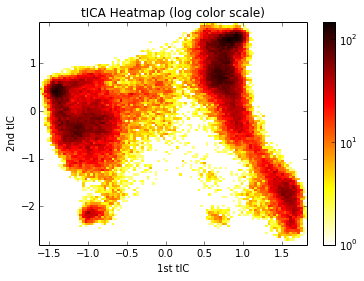

In [4]:
# Get all pairs of non-hydrogen atoms
from itertools import combinations
heavy_atoms = dataset.trajectories[0].topology.select_atom_indices('heavy')
heavy_pairs = list(combinations(heavy_atoms, 2))

 
pipeline1 = Pipeline([
    ('feat', AtomPairsFeaturizer(heavy_pairs)),
    ('tica', tICA(gamma=0, n_components=2)),
])

fit_and_plot(pipeline1, dataset.trajectories)